###

Reasons for the deviations from local isostasy (Zhong, 2000):
- dynamics compnesation processes immediatedly following orogeny that lead to non-isostaic staes (Zhong, 1997)
- subsequently icreased lithoshperic strength which is capable of suporrting deviatoric stresses indefinitely on a regional scale (Daly, 1940)

Cases from Zhong (2000):
- Case 1: ml.viscosity = 1e22 * u.pascal * u.second, ma.viscosity = 1e21 * u.pascal * u.second
- Case 2: ml.viscosity = 1e23 * u.pascal * u.second, ma.viscosity = 1e21 * u.pascal * u.second 
- Case 3: ml.viscosity = 1e24 * u.pascal * u.second, ma.viscosity = 1e21 * u.pascal * u.second 
- Case 4: include a weak lower crust

degree of 



### Reference
- Zhong, S. (1997). Dynamics of crustal compensation and its influences on crustal isostasy. Journal of Geophysical Research: Solid Earth, 102(B7), 15287-15299.
- Zhong, S., & Zuber, M. T. (2000). Crustal compensation during mountain‐building. Geophysical research letters, 27(18), 3009-3012.

- Characterization of Viscous Dissipative Heating in the Earth's Mantle Caused by Surface Forces

In [1]:
import underworld as uw
import underworld.function as fn
from underworld import UWGeodynamics as GEO
import numpy as np
import math

loaded rc file /opt/venv/lib/python3.10/site-packages/underworld/UWGeodynamics/uwgeo-data/uwgeodynamicsrc


In [2]:
u = GEO.UnitRegistry

# solver parameters
GEO.rcParams["initial.nonlinear.tolerance"] = 1e-3
GEO.rcParams['initial.nonlinear.max.iterations'] = 200
GEO.rcParams["nonlinear.tolerance"] = 1e-2
GEO.rcParams['nonlinear.max.iterations'] = 50
GEO.rcParams["popcontrol.particles.per.cell.2D"] = 30
GEO.rcParams["swarm.particles.per.cell.2D"] = 30

GEO.rcParams["surface.pressure.normalization"] = True
GEO.rcParams["pressure.smoothing"] = True

In [3]:
# input parameters
name_bcs = "_FreeSlipBotm"
fdir_output = "op_Zhong2000NMCase1"+name_bcs

xmin_box,xmax_box = -2000,2000   # unit [km]
ymin_box,ymax_box = -3000,0      # unit [km]


x_box = xmax_box-xmin_box
y_box = ymax_box-ymin_box

if uw.mpi.rank == 0:
    x_res,y_res = 400,300   
    npoints = 1000  
    dx = x_box/x_res
    dy = y_box/y_res

else:    
    x_res,y_res = 2400,1200
    npoints = 1200
    dx = x_box/x_res
    dy = y_box/y_res
    
conv_vel = 1.5 * u.centimeter / u.year  # 3.0  * u.centimeter / u.year /2

# dt = 2.5 * u.kiloyear
# Total_Convergence  = 500 *u.kilometer
# Total_Time = (Total_Convergence / conv_vel).to(u.megayear)

#scaling
ref_velocity = 1.5 * u.centimeter / u.year
ref_density = 3300. * u.kilogram / u.meter**3
ref_length = 1000. * u.kilometer  
ref_gravity =  10.0 * u.meter / u.second**2
gravity = 10.0 * u.meter / u.second**2
#ref_vicosity = 1e21 * u.pascal * u.second

T0 = 273.15 * u.degK  # 0 * u.degC
Tz = 1573.15 * u.degK # 1300 * u.degC at litho bottom
# Tz = 1300 + 273.15 + (-ymin_box-ml_thickness)*120

bodyforce = ref_density * ref_gravity
KL = ref_length
Kt = KL / ref_velocity
KM = bodyforce * KL**2 * Kt**2
KT = (Tz - T0)

# ref_velocity = 1. * u.centimeter / u.year
# ref_density = 3300. * u.kilogram / u.meter**3
# ref_length = 1000. * u.kilometer  
# ref_gravity =  10.0 * u.meter / u.second**2
# gravity = 10. * u.meter / u.second**2
# ref_vicosity = 1e21 * u.pascal * u.second

# T0 = 273.15 * u.degK  # 0 * u.degC
# Tz = 1573.15 * u.degK # 1300 * u.degC at litho bottom
# # Tz = 1300 + 273.15 + (-ymin_box-ml_thickness)*120

# bodyforce = ref_density * ref_gravity
# KL = ref_length
# KM = ref_density*KL**3
# Kt = KM/(KL*ref_vicosity)
# KT = (Tz - T0)

GEO.scaling_coefficients["[length]"] = KL
GEO.scaling_coefficients["[time]"] = Kt
GEO.scaling_coefficients["[mass]"]= KM
GEO.scaling_coefficients["[temperature]"] = KT

if uw.mpi.rank == 0:
    print('Length, km = ', GEO.dimensionalise(1., u.kilometer))
    print('Time, Myr = ',GEO.dimensionalise(1., u.megayear))
    print('Pressure, MPa = ',GEO.dimensionalise(1., u.megapascal))
    print('Temperature, K = ',GEO.dimensionalise(1., u.degK))
    print('Velocity, cm/yr = ',GEO.dimensionalise(1., u.centimeter / u.year))
    print('Viscosity, Pa S = ',GEO.dimensionalise(1.,u.pascal * u.second))
    
dx_nd = GEO.nd(dx*u.kilometer)
dy_nd = GEO.nd(dy*u.kilometer)

Length, km =  1000.0 kilometer
Time, Myr =  66.66666666666667 megayear
Pressure, MPa =  32999.999999999985 megapascal
Temperature, K =  1300.0 kelvin
Velocity, cm/yr =  1.5 centimeter / year
Viscosity, Pa S =  6.9426719999999984e+25 pascal * second


In [4]:
Model = GEO.Model(elementRes=(x_res, y_res),
                  minCoord=(xmin_box*u.kilometer, ymin_box*u.kilometer),
                  maxCoord=(xmax_box*u.kilometer, ymax_box*u.kilometer),
                  gravity=(0.0, -gravity))
Model.outputDir=fdir_output
#Model.minStrainRate = 1e-18 / u.second

	Global element size: 400x300
	Local offset of rank 0: 0x0
	Local range of rank 0: 400x300
In func WeightsCalculator_CalculateAll(): for swarm "O0H6SQ7L__swarm"
	done 33% (40000 cells)...
	done 67% (80000 cells)...
	done 100% (120000 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "O0H6SQ7L__swarm"


In [5]:
h0   = 0.* u.kilometer
Z_lc = -35. * u.kilometer
Z_ml = -100. * u.kilometer

#air_Shape = GEO.shapes.Layer(top=Model.top, bottom=h0)
lc_Shape = GEO.shapes.Layer2D(top=h0, bottom=Z_lc)
ml_Shape = GEO.shapes.Layer2D(top=Z_lc, bottom=Z_ml )
ma_Shape = GEO.shapes.Layer2D(top=Z_ml, bottom=Model.bottom)

#air = Model.add_material(name="Air", shape=air_Shape)

lc = Model.add_material(name="Crust", shape=lc_Shape)
ml = Model.add_material(name="Mantle Lithosphere", shape=ml_Shape)
ma = Model.add_material(name="Mantle Asthenosphere", shape=ma_Shape)

In [6]:
# coords = np.ndarray((npoints, 2))
# x = np.linspace(GEO.nd(Model.minCoord[0]), GEO.nd(Model.maxCoord[0]), npoints)
# y = np.ones_like(x)*GEO.nd(Z_lc)
# coords[:, 0] = x
# coords[:, 1] = y
# Model.add_passive_tracers(name="Moho", vertices=coords)

coords = np.ndarray((npoints, 2))
x = np.linspace(GEO.nd(Model.minCoord[0]), GEO.nd(Model.maxCoord[0]), npoints)
y = np.ones_like(x)*GEO.nd(Z_lc)
coords[:, 0] = x
coords[:, 1] = y
Model.add_passive_tracers(name="Moho", vertices=coords)

coords = np.ndarray((npoints, 2))
x = np.linspace(GEO.nd(Model.minCoord[0]), GEO.nd(Model.maxCoord[0]), npoints)
y = np.ones_like(x)*GEO.nd(Z_ml)
coords[:, 0] = x
coords[:, 1] = y
Model.add_passive_tracers(name="LAB", vertices=coords)

In [7]:
# if uw.mpi.rank == 0:
#     from underworld import visualisation as vis
#     fig_res = (1000,400)

#     Fig = vis.Figure(resolution=fig_res,rulers=True,margin = 80,rulerticks=7,quality=3,clipmap=False)
# #     Fig.Points(Model.Surface_tracers, pointSize=4.0)
# #     Fig.Points(Model.Moho_tracers, pointSize=4.0)
# #     Fig.Points(Model.LAB_tracers, pointSize=4.0)
#     Fig.Points(Model.swarm, Model.materialField,fn_size=2.0,discrete=True,colourBar=False)
#     Fig.show()
#     Fig.save("Modelsetup.png")

In [8]:
lc.density = 2800. * u.kilogram / u.metre**3 
ml.density = 3300. * u.kilogram / u.metre**3 
ma.density = 3300. * u.kilogram / u.metre**3 

Model.minViscosity = 1e17 * u.pascal * u.second
Model.maxViscosity = 1e28 * u.pascal * u.second

lc.viscosity = 1e22 * u.pascal * u.second
ml.viscosity = 1e22 * u.pascal * u.second
ma.viscosity = 1e21 * u.pascal * u.second

In [9]:
dt_e = 3000 * u.year   # observation time

mu      = 1.5e11 * u.pascal # Shear Modulus
eta     = 1e22 * u.pascal * u.second 
alpha   = eta / mu       # Relaxation time
mu_eff = eta*GEO.nd(dt_e)/(GEO.nd(alpha)+GEO.nd(dt_e))

lc.elasticity = GEO.Elasticity(shear_modulus= mu,observation_time= dt_e)    
ml.elasticity = GEO.Elasticity(shear_modulus= mu,observation_time= dt_e)
ma.elasticity = GEO.Elasticity(shear_modulus= mu,observation_time= dt_e)         
print('Relaxation time = ', alpha.to(u.years))
# print('Effective viscoisty = ', mu_eff.to(u.pascal * u.second ))

Relaxation time =  2112.53918760193 year


In [10]:
iv_or_t,v_or_t,boxl,all1,ramp1,all0,ramp0 =1,-1.5,4000.0,0.0,500.0,3500.0,500.0
iso,kkt,nox = 0,200,x_res+1

pi = np.pi
d=3.0e6
year = 365.0*24*3600.0
visc0 = 1e21
amu = 1.5e11
tscaling = visc0/amu
vscaling = d/tscaling*100*year

if iv_or_t==1:
    v_or_t = v_or_t/vscaling

ff = np.zeros(kkt)
for k in range(1, kkt+1):
    if  ramp1 != 0.0:
        ff[k-1] = v_or_t/(pi*k)* (np.cos(pi*k*(ramp1+all1)/boxl)-\
                                   boxl/(ramp0*pi*k)* \
                               (np.sin(pi*k*(ramp0+all0)/boxl)-np.sin(pi*k*all0/boxl)) \
                               -np.cos(pi*k*ramp1/boxl)+\
                                   boxl/(ramp1*pi*k)*np.sin(pi*k*ramp1/boxl))
    else:
        ff[k-1] = v_or_t/(pi*k)* \
              (mp.cos(pi*k*(ramp1+all1)/boxl)-boxl/(ramp0*pi*k)* \
            (mp.sin(pi*k*(ramp0+all0)/boxl)-mp.sin(pi*k*all0/boxl)) )

topo_v0max = 0.
for k in range(1, kkt+1):
    wavelength1 = 2 * boxl * 1000 / k
    aki = np.float128(2 * pi / wavelength1)
    topo_v0max+= ff[k-1] * vscaling
topo_v0max = np.abs(topo_v0max)

In [11]:
# xcoordi = np.linspace(-boxl*1000/2,boxl*1000/2,nox) 
# topo_v0_new = np.zeros(nox)
# for k in range(1, kkt+1):
#     wavelength1 = 2 * boxl * 1000 / k
#     aki = np.float128(2 * pi / wavelength1)
#     for ij in range(nox):
#         topo_v0_new[ij] += ff[k-1] * np.cos(xcoordi[ij] * aki)* vscaling

# import matplotlib.pyplot as plt
# %matplotlib inline

# fig, ax1 = plt.subplots(nrows=1, figsize=(10,4))
# ax1.set(xlabel='k', ylabel='frequency',title="Surface velocity in Fourier expansion") 
# ax1.plot(ff,"r--",label="Vel")


# fig, ax1 = plt.subplots(nrows=1, figsize=(10,4))
# ax1.set(xlabel='Distacne [km]', ylabel='velocity [cm/yr]',title='Surface velocity') 
# ax1.set_xlim([-boxl/2,boxl/2])
# ax1.set_ylim([-1.6,0])
# #ax1.plot(xcoordi/1000,topo_v0[:]*100,c="k",label="Vel_origin")
# ax1.plot(xcoordi/1000,topo_v0_new[:],"r--",label="Vel_fromff")
# ax1.legend(loc='lower right')
# fig.savefig("vel_inx")

In [12]:
vel = conv_vel   
depth = GEO.nd(Model.minCoord[1])
depth_trans0 = GEO.nd(-1000*u.kilometer)
depth_trans1 = GEO.nd(-2000*u.kilometer)
wavel_trans = depth_trans0-depth_trans1
topo_v0max_nd = topo_v0max/ref_velocity.m

def fn1():
    topo_v0 = 0.
    for k in range(1, kkt+1):
        wavelength1 = 2. * boxl * 1000 / k
        aki = 2. * pi / wavelength1 
        topo_v0 += ff[k-1] * fn.math.cos(Model.x*ref_length.m*1000.*aki)* vscaling
    return (topo_v0+topo_v0max)/ref_velocity.m

conditions = [(Model.x <=0., fn1()),
              (True,-fn1())]    
Vx = fn.branching.conditional(conditions)   

conditions_l = [(Model.y >= depth_trans0, topo_v0max_nd),
               (Model.y >= depth_trans1, topo_v0max_nd*fn.math.cos((Model.y-depth_trans0)/wavel_trans*pi)), 
              (True,-topo_v0max_nd)]
Vx_l = fn.branching.conditional(conditions_l)
conditions_r = [(Model.y >= depth_trans0, -topo_v0max_nd),
               (Model.y >= depth_trans1, -topo_v0max_nd*fn.math.cos((Model.y-depth_trans0)/wavel_trans*pi)), 
              (True,topo_v0max_nd)]
Vx_r = fn.branching.conditional(conditions_r)

Model.set_velocityBCs(left = [Vx_l,None],right=[Vx_r, None],bottom=[None, 0.0], top= [Vx, None],order_wall_conditions= ["left", "right", "top", "bottom"])

#Model.set_velocityBCs(left = [Vx_l,None],right=[Vx_r, None],bottom=[None, 0.0],nodeSets=[(Model.top_wall, [Vx, None])],order_wall_conditions= ["left", "right", "top", "bottom"])
Model.init_model(pressure="lithostatic")
Model.freeSurface = True

/opt/venv/lib/python3.10/site-packages/underworld/UWGeodynamics/_model.py:1595: UserWarning: Skipping the steady state calculation: No diffusivity variable defined on Model
  warnings.warn("Skipping the steady state calculation: No diffusivity variable defined on Model")


	Global element size: 400x300
	Local offset of rank 0: 0x0
	Local range of rank 0: 400x300


In [13]:
# fig, ax1 = plt.subplots(nrows=1, figsize=(10,4))
# ax1.set(xlabel='Distacne [km]', ylabel='velocity [cm/yr]',title='Surface velocity') 
# ax1.set_xlim([-boxl/2,boxl/2])
# #ax1.set_ylim([-1.6,0])
# #ax1.plot(xcoordi/1000,topo_v0[:]*100,c="k",label="Vel_origin")
# ax1.plot(xcoordi[:int(x_res/2)]/1000,(topo_v0_new[:int(x_res/2)]+topo_v0max)/ref_velocity.m,"r--",label="Vel_fromff")
# ax1.plot(xcoordi[int(x_res/2):]/1000,(-topo_v0_new[int(x_res/2):]-topo_v0max)/ref_velocity.m,"r--",label="Vel_fromff")
# ax1.legend(loc='lower right')
# #fig.savefig("vel_inx")

In [14]:
# import matplotlib.pyplot as plt

# # left = Model.mesh.specialSets[ 'Left_VertexSet'] 
# # right = Model.mesh.specialSets[ 'Right_VertexSet'] 
# vtop = Model.velocityField.data[Model.top_wall]
# fig, ax = plt.subplots(1, 1, figsize=(10,6))
# ax.plot(vtop[:,0],'k')

In [15]:
# ycoordi = np.linspace(-1,0,y_res+1) 
        
# vel = conv_vel   
# depth = GEO.nd(Model.minCoord[1])
# depth_trans0 = GEO.nd(-1000*u.kilometer)
# depth_trans1 = GEO.nd(-2000*u.kilometer)
# wavel_trans = depth_trans0-depth_trans1

# vyleft_test = np.zeros_like(ycoordi)
# for i,item in enumerate(ycoordi):
#     if item >= depth_trans0:
#         vyleft_test[i] = -topo_v0_/ref_velocity.m
#     elif item>=depth_trans1:
#         vyleft_test[i] = -topo_v0_/ref_velocity.m*np.cos((item-depth_trans0)/wavel_trans*pi)
#     else:
#         vyleft_test[i] = topo_v0_/ref_velocity.m

In [16]:
# fig, ax = plt.subplots(1, 1, figsize=(10,6))
# ax.plot(ycoordi,vyleft_test,'k')

In [17]:
# import matplotlib.pyplot as plt

# left = Model.mesh.specialSets[ 'Left_VertexSet'] 
# right = Model.mesh.specialSets[ 'Right_VertexSet'] 
# vleft = Model.velocityField.data[left.data, :]
# vright = Model.velocityField.data[right.data, :]
# fig, ax = plt.subplots(1, 1, figsize=(10,6))
# ax.plot(vleft[:,0],'k')
# ax.plot(vright[:,0],'r')

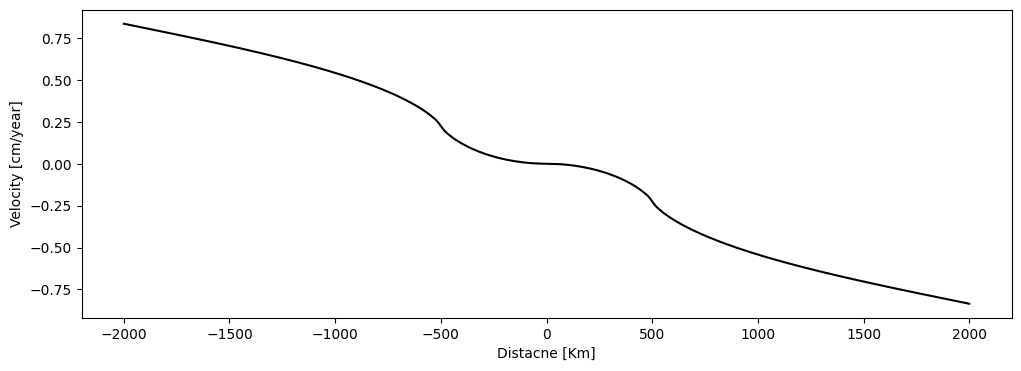

In [18]:
import matplotlib.pyplot as plt

# left = Model.mesh.specialSets[ 'Left_VertexSet'] 
# right = Model.mesh.specialSets[ 'Right_VertexSet'] 
vtop = Model.velocityField.data[Model.top_wall]
fig, ax1 = plt.subplots(nrows=1, figsize=(12,4))
ax1.set(xlabel='Distacne [Km]', ylabel='Velocity [cm/year]') 
ax1.plot(Model.mesh.data[Model.top_wall][:,0]*ref_length.m,vtop[:,0],'k')
fig.savefig("NM_vel_input") 

In [19]:
#def find_IndexSet(axis):
#     Sets = Model.mesh.specialSets["Empty"]
#     for index in axis:
#         Sets.add(index)
#     return Sets

# IndexSet_test = find_IndexSet(condition)

# IndexSet_test,IndexSet_test[:].shape
# IndexSet,IndexSet[:].shape


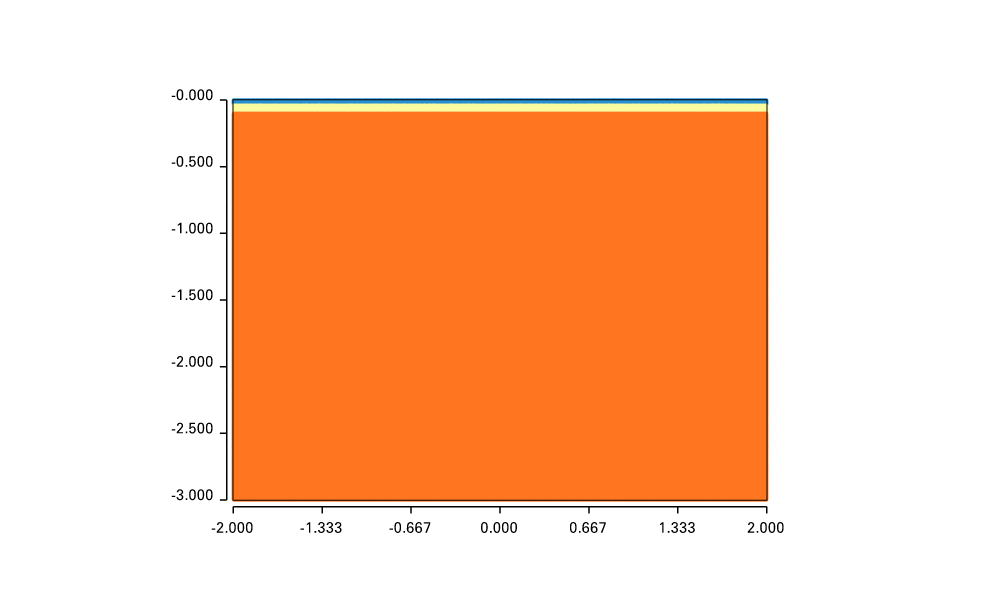

In [21]:
from underworld import visualisation as vis

Fig = vis.Figure(resolution=(1200,600),rulers=True,margin = 100,rulerticks=7,quality=3,clipmap=False)
#Fig.Points(Model.Moho_tracers, pointSize=4.0)
#Fig.Points(Model.LAB_tracers, pointSize=4.0)
Fig.Points(Model.swarm, Model.materialField,fn_size=4.0,discrete=True,colourBar=False)
#Fig.Points(Model.swarm, Model.materialField,fn_size=4.0,discrete=True,colourBar=False,colours = ["yellow","orange","red"])
Fig.VectorArrows(Model.mesh, Model.velocityField)
Fig.show()

In [ ]:
#Data to Save
outputss=['pressureField',
         'strainRateField',
         'velocityField',
          'projStressField',
           'projMaterialField',
         'projViscosityField',
         'projStressField',
         'projDensityField',
         'projStressTensor',]
GEO.rcParams['default.outputs']=outputss

Model.solver.set_inner_method("mumps")
# Model.solver.set_penalty(1e-3)
Model.temperatureDot = Model._temperatureDot

Total_Time = 3.1*u.megayear
checkpoint_interval = 0.1*u.megayear
dt = 1.*u.kiloyear
Model.run_for(Total_Time, checkpoint_interval=checkpoint_interval,dt=dt)

In [ ]:
#Model.run_for(nstep=2,checkpoint_interval=1,dt=500*u.year)